# <center><u> Clustering Kmean</u></center>
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups).It allow us to find groups of similar objects, objects that are more related to each other than to objects in other groups.

**Ex:**

Grouping of documents, music and movies by different topics or finding customers those having similar interest based on common purchase behaviors as a basis for recommendation engines

- One of the drawbacks of this clustering algorithm is that we have to specify the number of clusters
- An inappropriate choice for clusters can result in poor clustering performance.

**Algorithm:**
   - 1) Select k points at random as cluster centers.
   - 2) Assign objects to their closest cluster center according to the Euclidean distance function.
   - 3) Calculate the centroid or mean of all objects in each cluster.
   - 4) Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.
    
**Example-1(With 1 Input):**

Suppose we want to group the visitors to a website using just their age (one-dimensional space) as follows:

15,15,16,19,19,20,20,21,22,28,35,40,41,42,43,44,60,61,65

n = 19,k=2

**Sol:**

Select Initial clusters with 2 any random values:
Let’s
 - c1 = 16
 - c2 = 22

**Iteration 1:**
![](_pic/img-KMean/i1.PNG)
**Iteration 2:**
![](_pic/img-KMean/i2.PNG)
**Iteration 3:**
![](_pic/img-KMean/i3.PNG)
**Iteration 4:**
![](_pic/img-KMean/i4.PNG)

No change between iterations 3 and 4 has been noted. By using clustering, 2 groups have been
identified 15-28 and 35-65. The initial choice of centroids can affect the output clusters, so the algorithm is often run multiple times with different starting conditions in order to get a fair view what the clusters should be.

### <center>km = KMeans(n_clusters=2,n_init=5, max_iter =100)</center>
It means for 2 clusters it will run 5 times with different randomly selected initial
centroids with 100 iteration each run and internally compute SSE and the lowest
SSE centriods considered as final centroids.

![](_pic/img-KMean/Capture.PNG)

### Program(Python)

In [109]:
import pandas as pd
df=pd.read_csv('_dataset/Dataset-KMean/fruits_cluster.csv')
df.head()

,diameter,weight
0,6.0,100
1,6.1,70
2,3.0,30
3,3.2,35
4,5.5,80


<AxesSubplot:xlabel='diameter', ylabel='weight'>

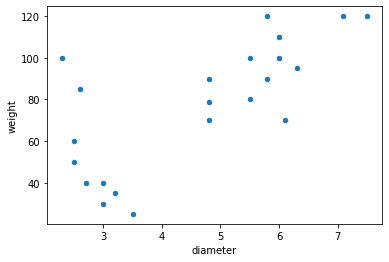

In [110]:
df.plot.scatter(x='diameter' , y='weight')

In [111]:
# X=df.iloc[:,0:1].values   #2d
# Y=df.weight.values       #1d

In [112]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,n_init=5,max_iter=10)
km.fit(df.values)

KMeans(max_iter=10, n_clusters=2, n_init=5)

In [113]:
km.cluster_centers_

array([[ 5.39333333, 95.26666667],
       [ 2.91428571, 40.        ]])

In [114]:
x1=km.cluster_centers_[:,0]
y1=km.cluster_centers_[:,-1]

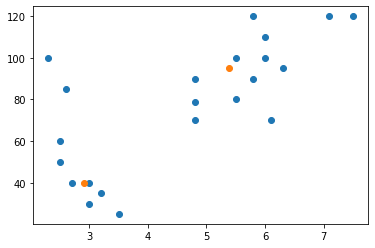

In [115]:
import matplotlib.pyplot as plt
plt.scatter(df.diameter,df.weight)
plt.scatter(x1,y1)
plt.show()

In [116]:
km.labels_

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [117]:
#  sum(error^2)
km.inertia_

4933.951238095238

In [118]:
km.cluster_centers_

array([[ 5.39333333, 95.26666667],
       [ 2.91428571, 40.        ]])

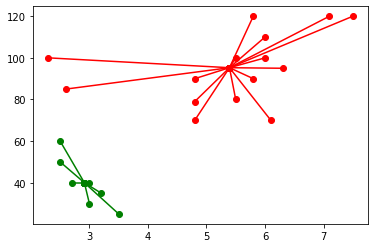

In [119]:
x1=km.cluster_centers_[:,0]
y1=km.cluster_centers_[:,-1]

for i in range(len(km.labels_)):

    if km.labels_[i] ==0:
            x=[km.cluster_centers_[0,0],df.diameter[i]]
            y=[km.cluster_centers_[0,1],df.weight[i]]
            
            plt.plot(x,y,marker='o',color='r')
        
    else:
            x=[km.cluster_centers_[1,0],df.diameter[i]]
            y=[km.cluster_centers_[1,1],df.weight[i]]
            plt.plot(x,y,marker='o',color='g')

In [120]:
df.diameter.values.flatten()

array([6. , 6.1, 3. , 3.2, 5.5, 7.1, 2.5, 2.3, 4.8, 4.8, 5.8, 2.6, 6. ,
       6.3, 3. , 3.5, 5.5, 7.5, 2.5, 2.7, 4.8, 5.8])

In [121]:
df.head()

,diameter,weight
0,6.0,100
1,6.1,70
2,3.0,30
3,3.2,35
4,5.5,80


In [108]:
df1 =df.copy() 
df1['label']=km.labels_

In [122]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
diameter,6.0,6.1,3.0,3.2,5.5,7.1,2.5,2.3,4.8,4.8,...,6.0,6.3,3.0,3.5,5.5,7.5,2.5,2.7,4.8,5.8
weight,100.0,70.0,30.0,35.0,80.0,120.0,60.0,100.0,70.0,79.0,...,110.0,95.0,40.0,25.0,100.0,120.0,50.0,40.0,90.0,90.0


In [58]:
b=df.to_numpy()

In [68]:
b=[list(df.diameter),list(df.weight),list(df.label)]
a=np.array(b,dtype=float)

array([[  6. ,   6.1,   3. ,   3.2,   5.5,   7.1,   2.5,   2.3,   4.8,
          4.8,   5.8,   2.6,   6. ,   6.3,   3. ,   3.5,   5.5,   7.5,
          2.5,   2.7,   4.8,   5.8],
       [100. ,  70. ,  30. ,  35. ,  80. , 120. ,  60. , 100. ,  70. ,
         79. , 120. ,  85. , 110. ,  95. ,  40. ,  25. , 100. , 120. ,
         50. ,  40. ,  90. ,  90. ],
       [  1. ,   0. ,   0. ,   0. ,   1. ,   1. ,   0. ,   1. ,   0. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   0. ,   0. ,   1. ,   1. ,
          0. ,   0. ,   1. ,   1. ]])

In [123]:
c=np.array(['diameter','weight','km.labels_'])
df2=pd.DataFrame(b,index=c)
df2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
diameter,6.0,6.1,3.0,3.2,5.5,7.1,2.5,2.3,4.8,4.8,...,6.0,6.3,3.0,3.5,5.5,7.5,2.5,2.7,4.8,5.8
weight,100.0,70.0,30.0,35.0,80.0,120.0,60.0,100.0,70.0,79.0,...,110.0,95.0,40.0,25.0,100.0,120.0,50.0,40.0,90.0,90.0
km.labels_,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


## Elbow method

In [ ]:
WSSE = []
clusterSize= range(1,20)

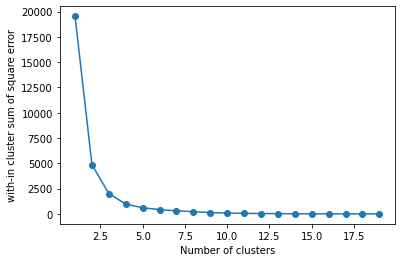

[19541.122272727273, 4870.704786324786, 2005.1141666666667, 970.9593809523807, 610.8816666666667, 424.20166666666665, 303.3808333333334, 224.19583333333333, 133.5925, 82.98333333333333, 58.48166666666667, 41.14833333333333, 24.295, 11.775000000000004, 3.84, 2.34, 1.495, 0.75, 0.25000000000000006]


In [126]:
for i in clusterSize:
    km = KMeans(n_clusters=i)
    km.fit(df.values)
    WSSE.append(km.inertia_)
    
    
plt.plot(clusterSize,WSSE,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('with-in cluster sum of square error')
plt.show()
print(WSSE)